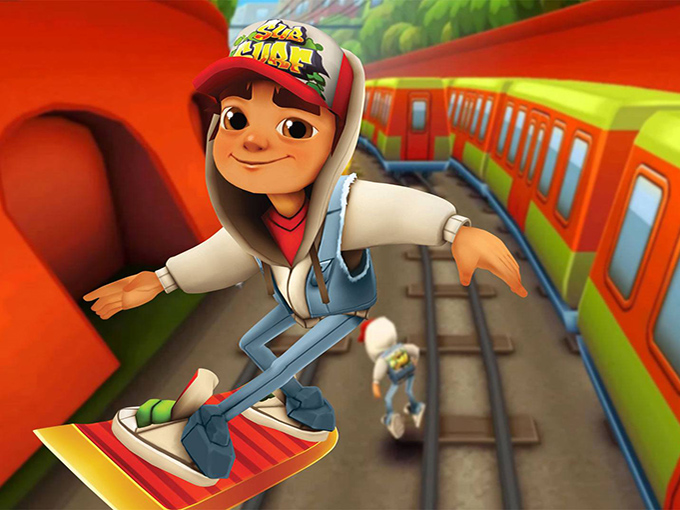
<!-- 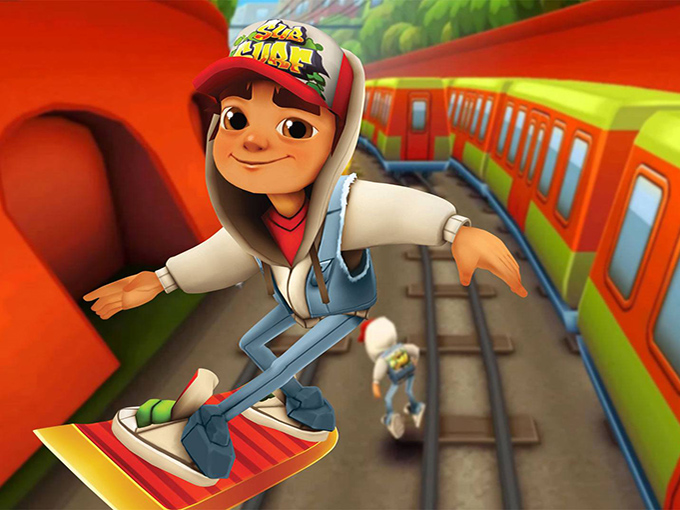 -->

In this notebook, we will do some analysis by looking at the data of Top Play Store Games.
* What is the percentage of free video games?
* Which video game category has the most overall ratings?
* What category of video games are the most installed?
* Wat are the best video games according to google play?


# Knowing the data

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
# import plotly.figure_factory as ff
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

In [ ]:
data = pd.read_csv('../input/top-play-store-games/android-games.csv')
data.head()

In [ ]:
# Size
print(data.shape)
print('='*25)
# Unique elements
print(data.nunique())

In [ ]:
print("installs:", list(data['installs'].unique()))
print("\n")
print("price:", list(data['price'].unique()))
print("\n")
print("category:", list(data['category'].unique()))

In [ ]:
data.info()
print("="*20)
data.describe().apply(lambda s: s.apply(lambda x: format(x, '2f')))

# Data cleaning and visualization 

In [ ]:
data[['installs','mult']] = data['installs'].str.split(expand=True)
data[['mult']] = data[['mult']].replace(to_replace=['M','K','k'],
             value = [1, 0.1, 0.1])
data[['installs']] = data[['installs']].astype(float, errors='raise')
data['installs'] = data['installs'] * data['mult']
data['installs'] = data['installs'].apply(lambda x: str(x) + ' ' + 'M')
data['price'] = data['price'].apply(lambda x : '$' + ' ' + str(x))
data = data.drop(columns='mult')

In [ ]:
prices_games = data[['price']].value_counts().to_frame().reset_index().rename(columns={0:'counts'})
prices_games['price'] = prices_games['price'].apply(lambda x : str(x) + ' ' + "video games")
labels = list(prices_games['price'])

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=prices_games['counts'], name="PRICE"),
             row=1, col=1)
fig.update_traces(hole=.5, hoverinfo="label+value+name")
fig.update_layout(
    title="Video game prices",
    title_x=0.3,
    legend=dict(
        x=0.5,
        y=1,
        traceorder="reversed",
        title_font_family="Times New Roman",
        font=dict(
            family="Courier",
            size=12,
            color="black")
    ))
fig.show()

In [ ]:
category_tr = data.groupby(by='category')['total ratings'].sum().to_frame().sort_values('total ratings').reset_index()
fig = px.bar(category_tr, x='total ratings', y='category',
             color='category')
fig.update_layout(showlegend=False,
                  title="Games Category by total ratings",
                  title_x=0.5,
                  xaxis_title='Total ratings',
                  yaxis_title='Category')
fig.show()

In [ ]:
cat_installs = data[['category','installs']]
cat_installs[['installs','mult']]=cat_installs['installs'].str.split(expand=True)
cat_installs[['installs']]=cat_installs[['installs']].astype(float, errors='raise')
cat_installs = cat_installs.groupby(by = 'category')['installs'].sum().to_frame().sort_values('installs').reset_index()

In [ ]:
fig = px.bar(cat_installs, x='installs', y='category',
             color='category')
fig.update_layout(showlegend=False,
                  title="Games Category by install amount",
                  title_x=0.5,
                  xaxis_title='Installs (Millions)',
                  yaxis_title='Category')
fig.show()

In [ ]:
data_table=data[['rank', 'title', 'category','total ratings', 'installs', 'average rating', 'price']]
data_table[['installs','mult']]=data_table['installs'].str.split(expand=True)
data_table[['installs']]=data_table[['installs']].astype(float, errors='raise')
data_table=data_table[['title', 'category','total ratings', 'installs', 'average rating', 'price']]
data_table=data_table.sort_values(['installs','total ratings', 'average rating'], ascending=False)[:20]
data_table['installs'] = data_table['installs'].apply(lambda x: str(x) + ' ' + 'M')

In [ ]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(data_table.columns),
#                 line_color='darkslategreen',
                fill_color='lightskyblue',
                align='center'),
    cells=dict(values=[list(data_table['title']),
                      list(data_table['category']),
                      list(data_table['total ratings']),
                      list(data_table['installs']),
                      list(data_table['average rating']),
                      list(data_table['price'])],
#                line_color='darkslategray',
#                fill_color='lightcyan',
               align=['left','center']))
    ])
fig.update_layout(title = "Top 20 Video Games by (installs, total ratings, average rating)",
                  title_x = 0.5)
fig.show()